In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv("seattle-weather.csv")
data['date'] = pd.to_datetime(data['date'])

# Feature engineering
data['avg_temp'] = (data['temp_max'] + data['temp_min']) / 2
data['temp_range'] = data['temp_max'] - data['temp_min']
data['month'] = data['date'].dt.month

# Final features and target
X = data[['precipitation', 'temp_max', 'temp_min', 'wind', 'avg_temp', 'temp_range', 'month']]
y = data['weather']


In [2]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("✅ Class Distribution After SMOTE:\n", Counter(y_balanced))


✅ Class Distribution After SMOTE:
 Counter({'drizzle': 641, 'rain': 641, 'sun': 641, 'snow': 641, 'fog': 641})


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

# Save scaler for GUI use
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print("✅ Data normalized and split")


✅ Data normalized and split


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"✅ {name} trained")


✅ Logistic Regression trained
✅ Random Forest trained
✅ SVM trained
✅ KNN trained



🔍 Logistic Regression
Accuracy: 0.6006
              precision    recall  f1-score   support

     drizzle       0.38      0.35      0.37       128
         fog       0.38      0.35      0.37       128
        rain       0.96      0.74      0.84       128
        snow       0.83      0.96      0.89       129
         sun       0.48      0.59      0.53       128

    accuracy                           0.60       641
   macro avg       0.61      0.60      0.60       641
weighted avg       0.61      0.60      0.60       641



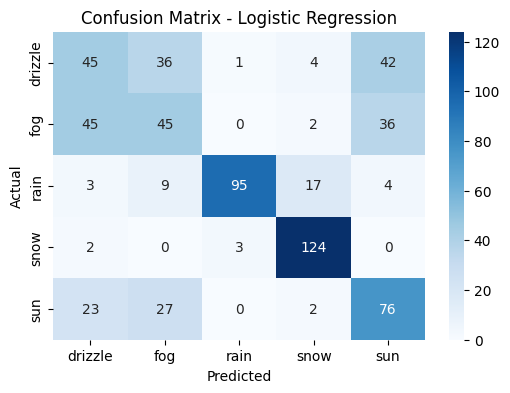


🔍 Random Forest
Accuracy: 0.8721
              precision    recall  f1-score   support

     drizzle       0.84      0.88      0.86       128
         fog       0.84      0.80      0.82       128
        rain       0.97      0.89      0.93       128
        snow       0.93      0.98      0.95       129
         sun       0.78      0.80      0.79       128

    accuracy                           0.87       641
   macro avg       0.87      0.87      0.87       641
weighted avg       0.87      0.87      0.87       641



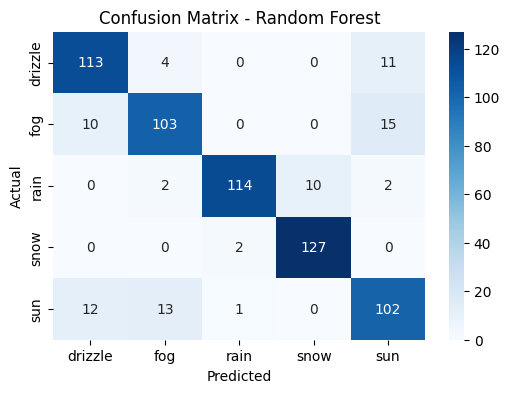


🔍 SVM
Accuracy: 0.6989
              precision    recall  f1-score   support

     drizzle       0.58      0.62      0.60       128
         fog       0.55      0.63      0.59       128
        rain       0.95      0.71      0.81       128
        snow       0.89      0.98      0.93       129
         sun       0.59      0.54      0.57       128

    accuracy                           0.70       641
   macro avg       0.71      0.70      0.70       641
weighted avg       0.71      0.70      0.70       641



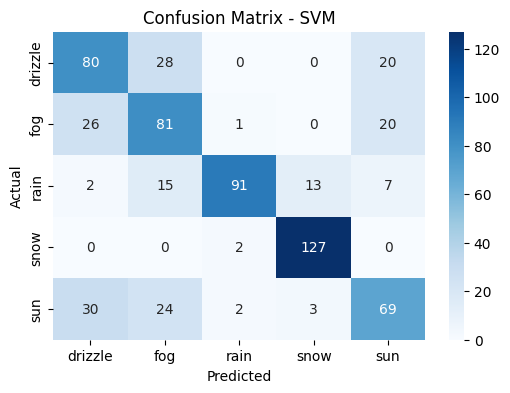


🔍 KNN
Accuracy: 0.7925
              precision    recall  f1-score   support

     drizzle       0.73      0.92      0.81       128
         fog       0.72      0.85      0.78       128
        rain       0.90      0.68      0.77       128
        snow       0.89      1.00      0.94       129
         sun       0.76      0.51      0.61       128

    accuracy                           0.79       641
   macro avg       0.80      0.79      0.78       641
weighted avg       0.80      0.79      0.78       641



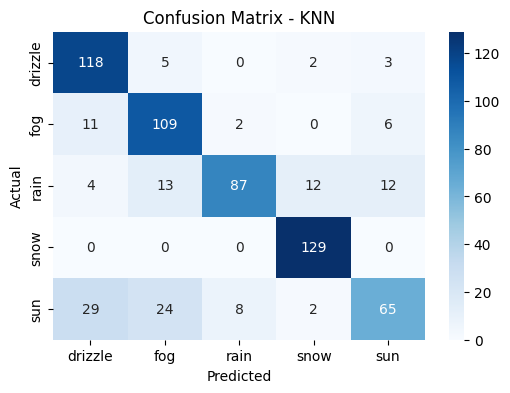

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for name, model in models.items():
    print(f"\n🔍 {name}")
    y_pred = model.predict(X_test)
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


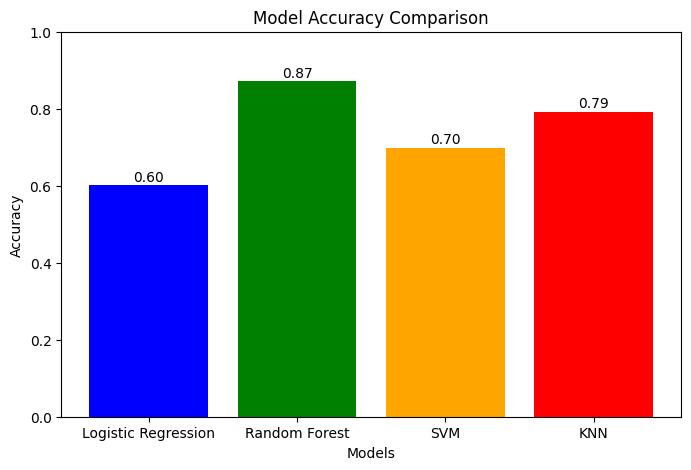

In [6]:
model_names = []
accuracies = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(acc)

plt.figure(figsize=(8,5))
plt.bar(model_names, accuracies, color=['blue','green','orange','red'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0,1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.01, f"{acc:.2f}", ha='center')
plt.show()


In [7]:
# Save all models
for name, model in models.items():
    filename = name.replace(" ", "_").lower() + ".pkl"
    with open(filename, "wb") as f:
        pickle.dump(model, f)
    print(f"📁 Saved: {filename}")


📁 Saved: logistic_regression.pkl
📁 Saved: random_forest.pkl
📁 Saved: svm.pkl
📁 Saved: knn.pkl
